## Creating CNN Using Scratch And Transfer Learning

In [24]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [25]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [26]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [27]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [28]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [29]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [30]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [31]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [32]:

# view the structure of the model
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [33]:
from tensorflow.keras.layers import MaxPooling2D

In [34]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)            

In [35]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [36]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [38]:
training_set

In [39]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [40]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
13/13 [==============================] - 19s 1s/step - loss: 2.7429 - accuracy: 0.4952 - val_loss: 0.7191 - val_accuracy: 0.4552
Epoch 2/25
13/13 [==============================] - 21s 2s/step - loss: 0.6391 - accuracy: 0.6442 - val_loss: 0.7825 - val_accuracy: 0.3731
Epoch 3/25
13/13 [==============================] - 22s 2s/step - loss: 0.5244 - accuracy: 0.7572 - val_loss: 0.9128 - val_accuracy: 0.2985
Epoch 4/25
13/13 [==============================] - 20s 2s/step - loss: 0.5029 - accuracy: 0.7452 - val_loss: 0.9144 - val_accuracy: 0.3358
Epoch 5/25
13/13 [==============================] - 18s 1s/step - loss: 0.4382 - accuracy: 0.7933 - val_loss: 0.9390 - val_accuracy: 0.4627
Epoch 6/25
13/13 [==============================] - 18s 1s/step - loss: 0.4079 - accuracy: 0.7981 - val_loss: 0.8646 - val_accuracy: 0.5000
Epoch 7/25
13/13 [==============================] - 20s 2s/step - loss: 0.4493 - accuracy: 0.7548 - val_loss: 1.0033 - val_accuracy: 0.4179
Epoch 8/25
13/13 [==

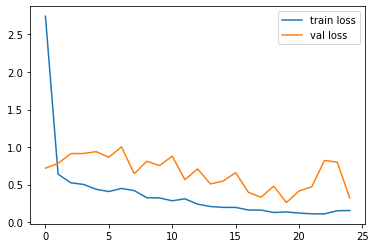

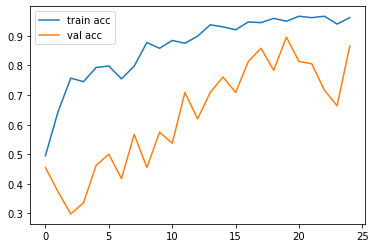

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [42]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [43]:

y_pred = model.predict(test_set)


In [44]:
y_pred

array([[9.98695076e-01, 1.30494905e-03],
       [8.62524211e-02, 9.13747549e-01],
       [9.76610184e-01, 2.33897865e-02],
       [9.98717904e-01, 1.28209230e-03],
       [1.30673036e-01, 8.69326949e-01],
       [1.93222269e-01, 8.06777775e-01],
       [8.47522140e-01, 1.52477831e-01],
       [1.08709432e-01, 8.91290605e-01],
       [8.71006966e-01, 1.28993005e-01],
       [5.00820160e-01, 4.99179929e-01],
       [9.94834304e-01, 5.16572641e-03],
       [9.99907851e-01, 9.20808598e-05],
       [1.24883160e-01, 8.75116825e-01],
       [9.99461591e-01, 5.38385182e-04],
       [4.12983447e-02, 9.58701670e-01],
       [1.91371962e-01, 8.08627963e-01],
       [8.48895162e-02, 9.15110469e-01],
       [9.99999881e-01, 9.83147359e-08],
       [2.31198341e-01, 7.68801689e-01],
       [9.45793211e-01, 5.42068221e-02],
       [4.64874245e-02, 9.53512609e-01],
       [5.16176939e-01, 4.83823031e-01],
       [1.51610002e-01, 8.48389983e-01],
       [1.39303476e-01, 8.60696495e-01],
       [1.694026

In [45]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [46]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [48]:
model=load_model('model_vgg19.h5')

In [49]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [50]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [51]:
x.shape

(224, 224, 3)

In [52]:
x=x/255

In [53]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [54]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [55]:
a=np.argmax(model.predict(img_data), axis=1)

In [56]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
